In [93]:
!pip install mlxtend

In [94]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import re #not a coding language but allows you to find patterns 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
import networkx as nx
import openpyxl

In [95]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [96]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [97]:
# Load data 
ds = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', engine='openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [98]:
# Summary statistics for all variables
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Check products cardinality
usernameCount = ds['userName'].value_counts()
usernameCount

Malgorzata@Margo7850p                    31
KodoDrummer@KodoDrummer                  24
Michele Amico🇮🇹🇮🇹🇮🇹🇮🇹@micheleaQ8239JH    19
packcal@packcal                          17
Dimitris L@750dimitrisl                  17
                                         ..
Mogoshadi S@mogoshadis                    1
Crystal Chris@CrystalPistol007            1
Grantley@GrantleyMorgan                   1
Burnsfun@Burnsfun                         1
czlido@czlido                             1
Name: userName, Length: 65785, dtype: int64

In [100]:
# Check products cardinality
userlocationCount = ds['userLocation'].value_counts()
userlocationCount

London, UK                 3710
Melbourne, Australia        773
Sydney, Australia           736
New York City, NY           699
Toronto, Canada             567
                           ... 
Teresopolis, RJ               1
Pittsworth, Australia         1
Scone, Australia              1
Berea, OH                     1
Elburg, The Netherlands       1
Name: userLocation, Length: 12613, dtype: int64

In [101]:
# Check products cardinality
tripTypeCount = ds['tripType'].value_counts()
tripTypeCount

Couples     31702
Family      13596
Friends     11759
Solo         5127
Business      868
Name: tripType, dtype: int64

In [102]:
#identify duplicate rows
duplicateRows = ds[ds.duplicated()]

In [103]:
#view duplicate rows
duplicateRows

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText


In [104]:
## figuring out if we can remove the outliers
ds['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
24      806
9       710
31      595
16      312
19      243
55      160
Name: positionOnRanking, dtype: int64

In [105]:
# removing rows from position on ranking 
ds =ds[ds['positionOnRanking']<=12]

In [106]:
ds['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
9       710
Name: positionOnRanking, dtype: int64

In [107]:
# checking for missing data,  creating bool series for missing data
bool_series = pd.isnull(ds['userLocation'])


In [108]:
# filtering data
# displaying data only with location = NaN
ds[bool_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
18,MAG001,2021-08-20 08:24:46.140,4.5,1,1186,163828,Resort714982@Resort714982,NaN,3,NaN,2021-07-22,2021-07-01,5,en,"its unreal, a fairytale, you keep looking at a..."
19,MAG001,2021-08-20 08:24:46.152,4.5,1,1186,163828,Jojo in Spain@JojoinSpain,NaN,2,NaN,2021-07-21,2021-07-01,5,en,Visit at the earliest or latest ties of daylig...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92050,MAG099,2021-08-21 16:26:27.447,5.0,1,73,5345,Ines@inesbudding,NaN,3,Solo,2019-06-05,2019-05-01,5,en,I think the place Stanislas is the most beauti...
92080,MAG100,2021-08-21 16:26:53.381,4.5,11,677,5179,Hannah L@hannahlS3100LD,NaN,1,NaN,2020-02-10,2020-01-01,1,en,"Stay away, Florence is a dangerous city. I was..."
92081,MAG100,2021-08-21 16:26:53.481,4.5,11,677,5179,domodosila@donosiaul,NaN,3,Family,2019-12-28,2019-12-01,5,en,no one to manage the queue n messy ! these 2 g...
92111,MAG100,2021-08-21 16:27:11.424,4.5,11,677,5179,Ilona E@ilonae244,NaN,23,Couples,2019-04-26,2019-04-01,5,en,We fell in love with this beautiful Italian ci...


In [109]:
#Use the modal value to replace missing data in userLocation
ds['userLocation'].replace([np.nan], ds['userLocation'].mode()[0], inplace=True)
print(ds)

      localID          extractionDate  globalRating  positionOnRanking  \
0      MAG001 2021-08-20 08:24:40.077           4.5                  1   
1      MAG001 2021-08-20 08:24:40.097           4.5                  1   
2      MAG001 2021-08-20 08:24:40.117           4.5                  1   
3      MAG001 2021-08-20 08:24:40.147           4.5                  1   
4      MAG001 2021-08-20 08:24:40.159           4.5                  1   
...       ...                     ...           ...                ...   
92115  MAG100 2021-08-21 16:27:11.795           4.5                 11   
92116  MAG100 2021-08-21 16:27:11.893           4.5                 11   
92117  MAG100 2021-08-21 16:27:11.993           4.5                 11   
92118  MAG100 2021-08-21 16:27:12.086           4.5                 11   
92119  MAG100 2021-08-21 16:27:17.026           4.5                 11   

       sitesOnRanking  totalReviews                   userName  \
0                1186        163828      Maur

In [110]:
# display data where location previously = NaN
ds[bool_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,"London, UK",4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,"London, UK",4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
18,MAG001,2021-08-20 08:24:46.140,4.5,1,1186,163828,Resort714982@Resort714982,"London, UK",3,NaN,2021-07-22,2021-07-01,5,en,"its unreal, a fairytale, you keep looking at a..."
19,MAG001,2021-08-20 08:24:46.152,4.5,1,1186,163828,Jojo in Spain@JojoinSpain,"London, UK",2,NaN,2021-07-21,2021-07-01,5,en,Visit at the earliest or latest ties of daylig...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92050,MAG099,2021-08-21 16:26:27.447,5.0,1,73,5345,Ines@inesbudding,"London, UK",3,Solo,2019-06-05,2019-05-01,5,en,I think the place Stanislas is the most beauti...
92080,MAG100,2021-08-21 16:26:53.381,4.5,11,677,5179,Hannah L@hannahlS3100LD,"London, UK",1,NaN,2020-02-10,2020-01-01,1,en,"Stay away, Florence is a dangerous city. I was..."
92081,MAG100,2021-08-21 16:26:53.481,4.5,11,677,5179,domodosila@donosiaul,"London, UK",3,Family,2019-12-28,2019-12-01,5,en,no one to manage the queue n messy ! these 2 g...
92111,MAG100,2021-08-21 16:27:11.424,4.5,11,677,5179,Ilona E@ilonae244,"London, UK",23,Couples,2019-04-26,2019-04-01,5,en,We fell in love with this beautiful Italian ci...


In [111]:
# checking for missing data review visited,  creating bool series for missing data
dv_series = pd.isnull(ds['reviewVisited'])

In [112]:
ds[dv_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
78,MAG001,2021-08-20 08:25:18.941,4.5,1,1186,163828,thomas@thomasphunos,"Manchester, UK",1,NaN,2020-09-25,NaT,4,en,"Amazing place , now a days it was not very qui..."
624,MAG001,2021-08-20 08:30:40.273,4.5,1,1186,163828,Paolo616616@Paolo616616,"Prague, Czech Republic",284,NaN,2020-02-03,NaT,5,en,"Beautiful unfinished building, should be compl..."
841,MAG001,2021-08-20 08:33:01.027,4.5,1,1186,163828,StevenK@stevenkoh9999,"Singapore, Singapore",172,NaN,2020-01-08,NaT,5,en,A lifetime of designing and planning by the ar...
850,MAG001,2021-08-20 08:33:06.518,4.5,1,1186,163828,Margarita@Margaritano,Europe,18,NaN,2020-01-07,NaT,4,en,Everybody suggest Sagrada Familia. I loved the...
3183,MAG001,2021-08-20 08:55:30.759,4.5,1,1186,163828,Andrew Jones@wigan1969,"London, UK",2,NaN,2019-09-05,NaT,1,en,"Nice to look at from the outside, however I ha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89332,MAG087,2021-08-21 15:58:48.146,4.0,1,5,6182,Jo P@I4996RBjoannap,"Brough, UK",343,NaN,2019-07-31,NaT,5,en,Plenty to walk around and see and you can walk...
89338,MAG087,2021-08-21 15:58:48.682,4.0,1,5,6182,GMcC73@GMcC73,"Cork, Ireland",36,NaN,2019-07-28,NaT,4,en,We spent a really enjoyable 4 hours there with...
89339,MAG087,2021-08-21 15:58:48.774,4.0,1,5,6182,CWXXXJH@CWXXXJH,"Berkhamsted, UK",46,NaN,2019-07-22,NaT,5,en,Well worth signing up for one of the twice dai...
89347,MAG087,2021-08-21 15:58:54.396,4.0,1,5,6182,Lala L@LalaL827,"Alrewas, UK",87,NaN,2019-07-10,NaT,3,en,"I cycled here in the morning, came off the mai..."


In [113]:
#Use the modal value to replace missing data in reviewvisited
ds['reviewVisited'].replace([np.nan], ds['reviewVisited'].mode()[0], inplace=True)

In [114]:
ds[dv_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
78,MAG001,2021-08-20 08:25:18.941,4.5,1,1186,163828,thomas@thomasphunos,"Manchester, UK",1,NaN,2020-09-25,2019-09-01,4,en,"Amazing place , now a days it was not very qui..."
624,MAG001,2021-08-20 08:30:40.273,4.5,1,1186,163828,Paolo616616@Paolo616616,"Prague, Czech Republic",284,NaN,2020-02-03,2019-09-01,5,en,"Beautiful unfinished building, should be compl..."
841,MAG001,2021-08-20 08:33:01.027,4.5,1,1186,163828,StevenK@stevenkoh9999,"Singapore, Singapore",172,NaN,2020-01-08,2019-09-01,5,en,A lifetime of designing and planning by the ar...
850,MAG001,2021-08-20 08:33:06.518,4.5,1,1186,163828,Margarita@Margaritano,Europe,18,NaN,2020-01-07,2019-09-01,4,en,Everybody suggest Sagrada Familia. I loved the...
3183,MAG001,2021-08-20 08:55:30.759,4.5,1,1186,163828,Andrew Jones@wigan1969,"London, UK",2,NaN,2019-09-05,2019-09-01,1,en,"Nice to look at from the outside, however I ha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89332,MAG087,2021-08-21 15:58:48.146,4.0,1,5,6182,Jo P@I4996RBjoannap,"Brough, UK",343,NaN,2019-07-31,2019-09-01,5,en,Plenty to walk around and see and you can walk...
89338,MAG087,2021-08-21 15:58:48.682,4.0,1,5,6182,GMcC73@GMcC73,"Cork, Ireland",36,NaN,2019-07-28,2019-09-01,4,en,We spent a really enjoyable 4 hours there with...
89339,MAG087,2021-08-21 15:58:48.774,4.0,1,5,6182,CWXXXJH@CWXXXJH,"Berkhamsted, UK",46,NaN,2019-07-22,2019-09-01,5,en,Well worth signing up for one of the twice dai...
89347,MAG087,2021-08-21 15:58:54.396,4.0,1,5,6182,Lala L@LalaL827,"Alrewas, UK",87,NaN,2019-07-10,2019-09-01,3,en,"I cycled here in the morning, came off the mai..."


In [115]:
# checking for missing data for trip type,  creating bool series for missing data
tt_series = pd.isnull(ds['tripType'])
ds[tt_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,"London, UK",4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,"London, UK",4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
11,MAG001,2021-08-20 08:24:46.010,4.5,1,1186,163828,journeymaid48@journeymaid48,"Fairport, NY",961,NaN,2021-08-09,2021-07-01,5,en,The Sagrada Familia is the most visited attrac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92090,MAG100,2021-08-21 16:26:59.393,4.5,11,677,5179,G_EvansWales@G_EvansWales,"Brecon, UK",848,NaN,2019-10-09,2019-09-01,5,en,What can be written about this place that has ...
92093,MAG100,2021-08-21 16:26:59.670,4.5,11,677,5179,SoCalOregonian@SoCalOregonian,"Murrieta, CA",9514,NaN,2019-09-13,2019-04-01,5,en,Built upon an Etruscan settlement and later th...
92095,MAG100,2021-08-21 16:26:59.858,4.5,11,677,5179,JanuszRoman@JanuszRoman,Europe,1097,NaN,2019-09-01,2019-08-01,5,en,Centro Storico is the essence of Florence. You...
92096,MAG100,2021-08-21 16:26:59.953,4.5,11,677,5179,stinkwink@stinkwink,"Sydney, Australia",7382,NaN,2019-08-23,2019-06-01,5,en,"When I hear that the city of Renaissance, Flor..."


In [116]:
# replace missing values with other as it is too high of a percentage to replace with the mode.
ds['tripType'].fillna(value = 'Other', inplace = True)

In [117]:
# check to see if it worked
ds[tt_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,Other,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,Other,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,"London, UK",4,Other,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,"London, UK",4,Other,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
11,MAG001,2021-08-20 08:24:46.010,4.5,1,1186,163828,journeymaid48@journeymaid48,"Fairport, NY",961,Other,2021-08-09,2021-07-01,5,en,The Sagrada Familia is the most visited attrac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92090,MAG100,2021-08-21 16:26:59.393,4.5,11,677,5179,G_EvansWales@G_EvansWales,"Brecon, UK",848,Other,2019-10-09,2019-09-01,5,en,What can be written about this place that has ...
92093,MAG100,2021-08-21 16:26:59.670,4.5,11,677,5179,SoCalOregonian@SoCalOregonian,"Murrieta, CA",9514,Other,2019-09-13,2019-04-01,5,en,Built upon an Etruscan settlement and later th...
92095,MAG100,2021-08-21 16:26:59.858,4.5,11,677,5179,JanuszRoman@JanuszRoman,Europe,1097,Other,2019-09-01,2019-08-01,5,en,Centro Storico is the essence of Florence. You...
92096,MAG100,2021-08-21 16:26:59.953,4.5,11,677,5179,stinkwink@stinkwink,"Sydney, Australia",7382,Other,2019-08-23,2019-06-01,5,en,"When I hear that the city of Renaissance, Flor..."


In [118]:
# Loading the Table Attraction and combine with existing data set 
wb = openpyxl.load_workbook('EuropeTop100Attractions_ENG_20190101_20210821.xlsx')
print(wb.sheetnames)

['Reviews', 'Attractions']


In [119]:
ds_att = pd.read_excel(io = 'EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name= 'Attractions',engine= 'openpyxl')
ds_att

,ID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ
...,...,...,...,...
95,MAG096,Duomo di Pisa,Italy,IT
96,MAG097,La Lonja de la Seda,Spain,ES
97,MAG098,The Walls of Avila,Spain,ES
98,MAG099,Place Stanislas,France,FR


In [120]:
ds_att.columns

Index(['ID', 'Name', 'Country', 'ISO'], dtype='object')

In [121]:
ds_att.columns = ['localID', 'Name', 'Country', 'ISO']
ds_att.columns

Index(['localID', 'Name', 'Country', 'ISO'], dtype='object')

In [122]:
ds_com = ds.merge(ds_att, how='left', on='localID')
ds_com.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,Other,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


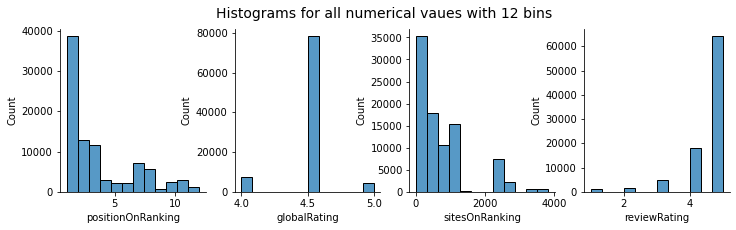

In [123]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Identify numeric variables
numerical=['positionOnRanking','globalRating','sitesOnRanking','reviewRating']
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_com[numerical], ax.flatten()):
    g = sns.histplot(data=ds_com,
                bins=12,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms for all numerical vaues with 12 bins", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('MultipleHistogram.svg', bbox_inches="tight")

In [124]:
# splitting the dataset to prepandemic and post pandemic 
import datetime
datetime.datetime.strptime
ds_pre_pandemic=ds_com[ds_com['reviewVisited']<=pd.Timestamp(2020,3,1)]
ds_pre_pandemic.describe(include='all').T

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/919966153.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pre_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/919966153.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pre_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/919966153.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_n

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,84486,94,MAG001,8221,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,84486,84272,2021-08-20 08:53:17.336000,2,2021-08-20 08:25:08.284,2021-08-21 16:27:17.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,84486.0,NaN,NaN,NaN,NaT,NaT,4.485773,0.180085,4.0,4.5,4.5,4.5,5.0
positionOnRanking,84486.0,NaN,NaN,NaN,NaT,NaT,3.399309,3.100939,1.0,1.0,2.0,5.0,12.0
sitesOnRanking,84486.0,NaN,NaN,NaN,NaT,NaT,756.013908,794.551019,5.0,154.0,484.0,1186.0,3836.0
totalReviews,84486.0,NaN,NaN,NaN,NaT,NaT,42300.905298,43864.462458,5179.0,14608.0,26042.0,51324.0,163828.0
userName,84466,60876,KodoDrummer@KodoDrummer,24,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,84486,12155,"London, UK",15350,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84486.0,NaN,NaN,NaN,NaT,NaT,452.146036,6624.420548,0.0,20.0,66.0,212.0,607732.0
tripType,84486,6,Couples,29454,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
ds_pandemic=ds_com[ds_com['reviewVisited']>pd.Timestamp(2020,3,1)]
ds_pandemic.describe(include='all').T

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/2635764454.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/2635764454.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/2635764454.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeri

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,5518,94,MAG024,649,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,5518,5513,2021-08-20 08:25:45.832000,2,2021-08-20 08:24:40.077,2021-08-21 16:26:47.604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,5518.0,NaN,NaN,NaN,NaT,NaT,4.470188,0.180551,4.0,4.5,4.5,4.5,5.0
positionOnRanking,5518.0,NaN,NaN,NaN,NaT,NaT,3.120696,2.766996,1.0,1.0,2.0,4.0,12.0
sitesOnRanking,5518.0,NaN,NaN,NaN,NaT,NaT,477.74266,706.225376,5.0,73.0,188.0,487.0,3836.0
totalReviews,5518.0,NaN,NaN,NaN,NaT,NaT,26260.205328,25149.308132,5179.0,8582.0,18087.0,34703.0,163828.0
userName,5518,4448,KDJERO@KDJERO,9,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,5518,1494,"London, UK",1474,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,5518.0,NaN,NaN,NaN,NaT,NaT,665.295216,11716.616743,1.0,11.0,50.0,191.0,607727.0
tripType,5518,6,Other,2477,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graphs

#### Histogram of numerical values prepandemic and pandemic 

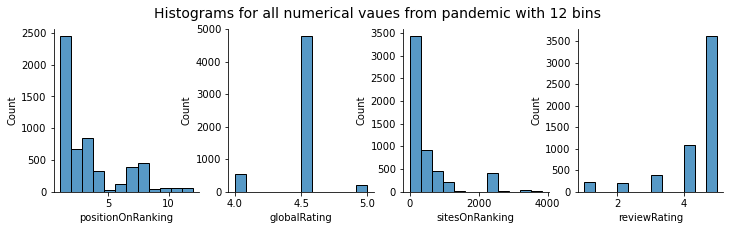

In [126]:
# Identify numeric variables
numerical= ['positionOnRanking','globalRating','sitesOnRanking','reviewRating']
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pandemic[numerical], ax.flatten()):
    g = sns.histplot(data=ds_pandemic,
                bins=12,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms for all numerical vaues from pandemic with 12 bins", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('MultipleHistogram.svg', bbox_inches="tight")

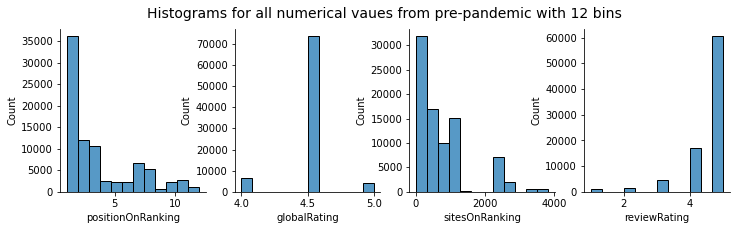

In [127]:
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pre_pandemic[numerical], ax.flatten()):
    g = sns.histplot(data=ds_pre_pandemic,
                bins=12,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms for all numerical vaues from pre-pandemic with 12 bins", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('MultipleHistogram2.svg', bbox_inches="tight")

#### BOXPLOT (ALL NUMERIC VARIABLES)

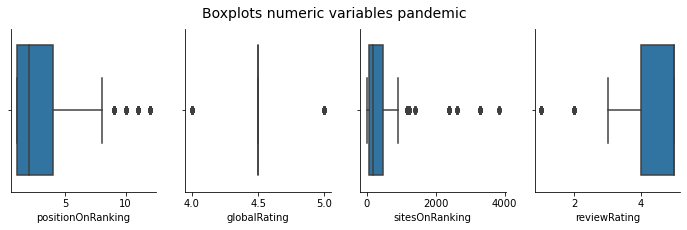

In [128]:
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pandemic[numerical], ax.flatten()):
    g = sns.boxplot(data=ds_pandemic,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots numeric variables pandemic", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('boxplot1.svg', bbox_inches="tight")

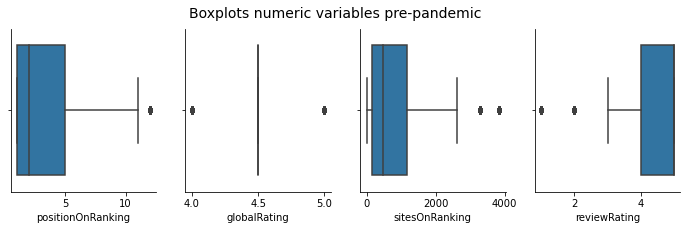

In [129]:
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pre_pandemic[numerical], ax.flatten()):
    g = sns.boxplot(data=ds_pre_pandemic,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots numeric variables pre-pandemic", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('boxplot2.svg', bbox_inches="tight")

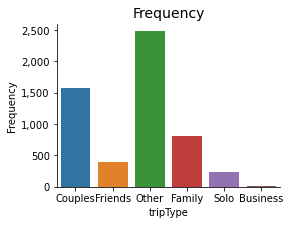

In [130]:
# Frequency of trip type

# Draw
fig, ax = plt.subplots(figsize=(4,3))
g = sns.countplot(data=ds_pandemic, x=ds_pandemic['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency", fontsize=plots_Title_fontSize)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

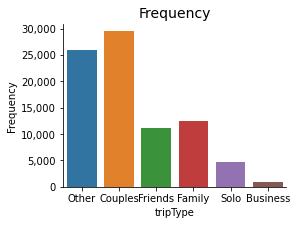

In [131]:
# Frequency of trip type

# Draw
fig, ax = plt.subplots(figsize=(4,3))
g = sns.countplot(data=ds_pre_pandemic, x=ds_pre_pandemic['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency", fontsize=plots_Title_fontSize)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

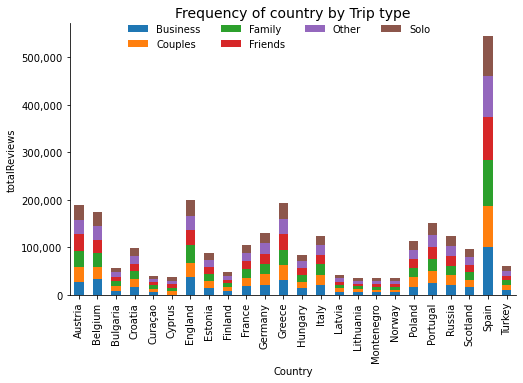

In [148]:
# understanding the frequency by trip type and local ID 

countriesList = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Curaçao', 'Cyprus', 'England', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia','Lithuania', 'Montenegro', 'Norway', 'Poland', 'Portugal', 'Russia', 'Scotland', 'Spain', 'Turkey'] 
# Aggregate and sort
tempDS_pre = ds_pre_pandemic.pivot_table(values=['totalReviews'], 
                      index='Country',
                      columns='tripType',
                      fill_value=0)
# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = tempDS_pre.plot(kind='bar', stacked=True, ax=ax)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency of country by Trip type", fontsize=plots_Title_fontSize)
plt.xlabel("Country")
plt.ylabel("totalReviews")
ax.set_xticklabels(countriesList)
plt.xticks(rotation=90, ha='center')
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels = ['Business','Couples', 'Family', 'Friends', 'Other', 'Solo']
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

In [133]:
#filtering data by Portugal
countries = ['Portugal']
PT = ds_com[ds_com.Country.isin(countries)]

# Modeling

In [134]:
# splitting the dataset to prepandemic and filtering information by Portugal
import datetime
datetime.datetime.strptime
ds_pre_pandemicPT=PT[PT['reviewVisited']<=pd.Timestamp(2020,3,1)]
ds_pre_pandemicPT.describe(include='all').T

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/2941090123.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pre_pandemicPT.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/2941090123.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pre_pandemicPT.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/2941090123.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `dateti

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,5343,7,MAG010,1342,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,5343,5343,2021-08-20 13:10:54.564000,1,2021-08-20 13:10:54.564,2021-08-21 16:16:10.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,5343.0,NaN,NaN,NaN,NaT,NaT,4.427194,0.28965,4.0,4.0,4.5,4.5,5.0
positionOnRanking,5343.0,NaN,NaN,NaN,NaT,NaT,2.958825,1.915031,1.0,1.0,3.0,6.0,6.0
sitesOnRanking,5343.0,NaN,NaN,NaN,NaT,NaT,435.804417,285.129018,71.0,71.0,355.0,726.0,726.0
totalReviews,5343.0,NaN,NaN,NaN,NaT,NaT,25368.619128,9231.112529,6805.0,18392.0,24454.0,36979.0,36979.0
userName,5343,3804,DianeER@DianeER,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,5343,1660,"London, UK",836,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,5343.0,NaN,NaN,NaN,NaT,NaT,673.085907,5315.113239,1.0,29.0,97.0,307.0,165905.0
tripType,5343,6,Couples,2050,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# splitting the dataset to pandemic and filtering information by Portugal
ds_pandemicPT=PT[PT['reviewVisited']>pd.Timestamp(2020,3,1)]
ds_pandemicPT.describe(include='all').T

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/1483293127.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pandemicPT.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/1483293127.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pandemicPT.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/1483293127.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_nu

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,216,7,MAG010,55,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,216,216,2021-08-20 13:10:44.095000,1,2021-08-20 13:10:44.095,2021-08-21 16:14:42.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,216.0,NaN,NaN,NaN,NaT,NaT,4.444444,0.311286,4.0,4.0,4.5,4.5,5.0
positionOnRanking,216.0,NaN,NaN,NaN,NaT,NaT,2.824074,1.996875,1.0,1.0,2.0,6.0,6.0
sitesOnRanking,216.0,NaN,NaN,NaN,NaT,NaT,403.263889,286.123928,71.0,71.0,355.0,726.0,726.0
totalReviews,216.0,NaN,NaN,NaN,NaT,NaT,24552.888889,9606.920646,6805.0,18392.0,24454.0,36979.0,36979.0
userName,216,159,GlobeTrotter10101@GlobeTrotter10101,6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,216,91,"London, UK",55,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,216.0,NaN,NaN,NaN,NaT,NaT,795.509259,2175.445949,1.0,14.0,89.5,316.5,10995.0
tripType,216,5,Other,103,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


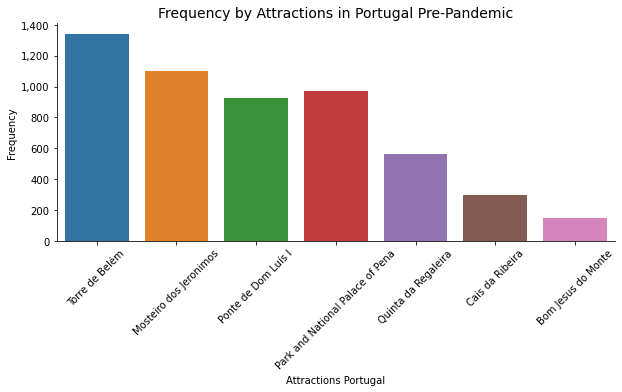

In [136]:
# Frequency by attractions in Portugal Pre-Pandemic 

# Draw
fig, ax = plt.subplots(figsize=(10,4))
g = sns.countplot(data=ds_pre_pandemicPT, x=ds_pre_pandemicPT['Name'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency by Attractions in Portugal Pre-Pandemic", fontsize=plots_Title_fontSize)
plt.xlabel("Attractions Portugal")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='center')
plt.rc('axes', labelsize=subPlots_label_fontSize)

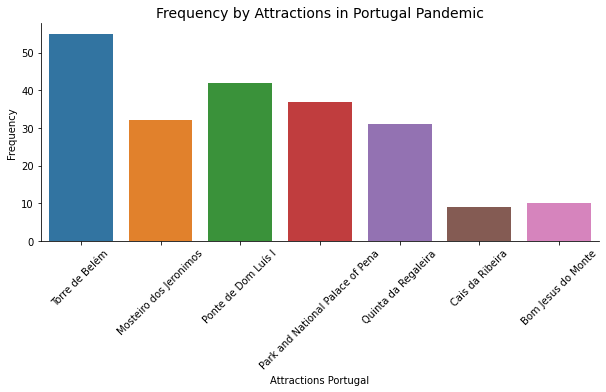

In [137]:
# Frequency by attractions in Portugal during the Pandemic 

# Draw
fig, ax = plt.subplots(figsize=(10,4))
g = sns.countplot(data=ds_pandemicPT, x=ds_pandemicPT['Name'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency by Attractions in Portugal Pandemic", fontsize=plots_Title_fontSize)
plt.xlabel("Attractions Portugal")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='center')
plt.rc('axes', labelsize=subPlots_label_fontSize)

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/1755284224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PT['Month'] = PT['reviewVisited'].dt.month
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_40100/1755284224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PT['Year'] = PT['reviewVisited'].dt.year
/Users/katia/opt/anaconda3/lib/python3.9/site-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleare

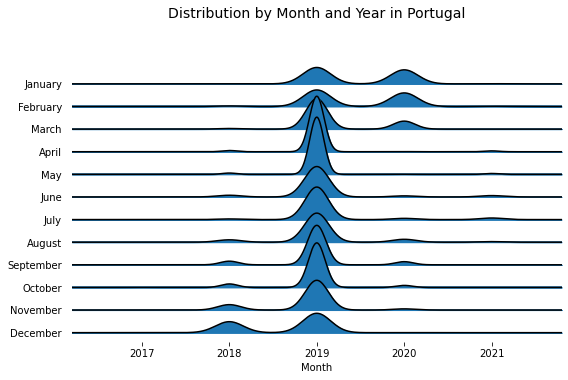

In [138]:
# Sales distribution by month and year filtered out by Portugal

# Create columns with Month and Year
PT['Month'] = PT['reviewVisited'].dt.month
PT['Year'] = PT['reviewVisited'].dt.year

# Draw
MonthsList = ['January','February','March','April','May','June','July', 'August', 'September', 'October','November', 'December']
fig, ax = plt.subplots(figsize=(8,5))
g = joypy.joyplot(data=PT, column='Year', by='Month', labels=MonthsList, ax=ax)

# Decoration
plt.title("Distribution by Month and Year in Portugal", fontsize=plots_Title_fontSize)
plt.xlabel("Month")
plt.rc('axes', labelsize=subPlots_label_fontSize)

In [149]:
# Show top 10 countries most visited, Portugal is in the top 10
top_10_countries = ds_com['Country'].value_counts().head(10)
print(top_10_countries)

Spain       22099
England     18673
Italy        6864
Portugal     5559
Poland       4448
France       4089
Austria      3858
Russia       3424
Greece       3158
Croatia      2323
Name: Country, dtype: int64


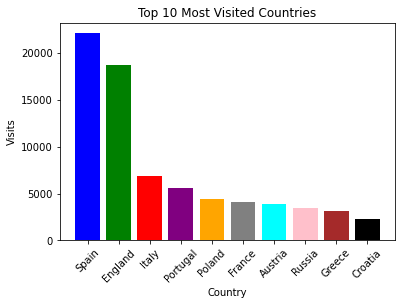

In [157]:
# illustrate this in a graph

# Create a dictionary with the data
data = {'Spain': 22099, 'England': 18673, 'Italy': 6864, 'Portugal': 5559,
        'Poland': 4448, 'France': 4089, 'Austria': 3858, 'Russia': 3424,
        'Greece': 3158, 'Croatia': 2323}

# Create a list of the keys (countries)
countries = list(data.keys())

# Create a list of the values (visits)
visits = list(data.values())

# Create the bar chart
plt.bar(countries, visits)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Visits')
plt.title('Top 10 Most Visited Countries')
plt.xticks(rotation=45, ha='center')

# change the colour of each bar 
colors = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'cyan', 'pink', 'brown', 'black']
plt.bar(countries, visits, color=colors)

# Show the chart
plt.show()


In [160]:
# Show top 10 most visited attractions, 
top_10_att = ds_com['Name'].value_counts().head(10)
print(top_10_att)

Basilica of the Sagrada Familia         8309
Tower of London                         5568
The Roman Baths                         2872
Parc Guell                              2834
Old Town                                2710
Acropolis                               2669
Schönbrunn Palace                       2392
Real Alcazar de Sevilla                 2029
Westminster Abbey                       1895
Krakow's Rynek Glowny Central Square    1869
Name: Name, dtype: int64


We can see that Portugal attractions did not make it in the top 10 most visited attractions of europe despited in total being in the 10 countries most visited

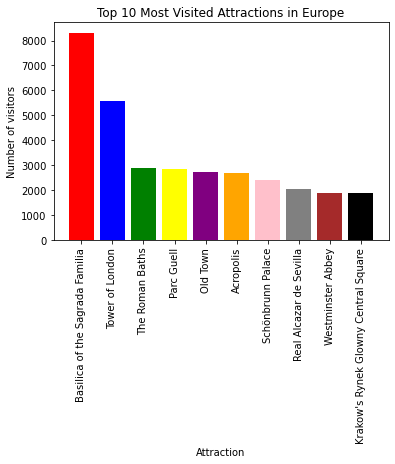

In [164]:
# illustrate this in a graph

# Create a list of the names of the places
names_att = ['Basilica of the Sagrada Familia', 'Tower of London', 'The Roman Baths', 'Parc Guell', 'Old Town', 'Acropolis', 'Schönbrunn Palace', 'Real Alcazar de Sevilla', 'Westminster Abbey', "Krakow's Rynek Glowny Central Square"]

# Create a list of the number of visitors for each place
visitors_att = [8309, 5568, 2872, 2834, 2710, 2669, 2392, 2029, 1895, 1869]

# Create a bar graph with different colors for each bar
plt.bar(names_att, visitors_att, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'brown', 'black'])

# Add labels to the x and y axes
plt.xlabel('Attraction')
plt.ylabel('Number of visitors')
plt.title('Top 10 Most Visited Attractions in Europe')
plt.xticks(rotation=90, ha='center')

# Show the graph
plt.show()

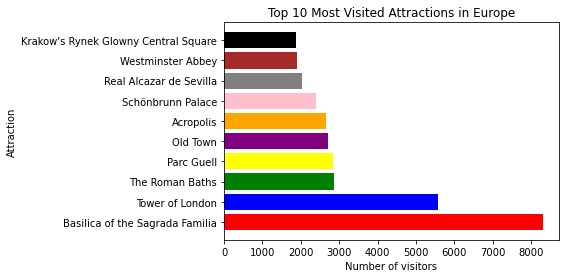

In [183]:

# Create a list of the names of the places
names_att = ['Basilica of the Sagrada Familia', 'Tower of London', 'The Roman Baths', 'Parc Guell', 'Old Town', 'Acropolis', 'Schönbrunn Palace', 'Real Alcazar de Sevilla', 'Westminster Abbey', "Krakow's Rynek Glowny Central Square"]

# Create a list of the number of visitors for each place
visitors_att = [8309, 5568, 2872, 2834, 2710, 2669, 2392, 2029, 1895, 1869]

# Create a bar graph with different colors for each bar
plt.barh(names_att, visitors_att, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'brown', 'black'])

# Add labels to the x and y axes
plt.ylabel('Attraction')
plt.xlabel('Number of visitors')
plt.title('Top 10 Most Visited Attractions in Europe')

# Show the graph
plt.show()


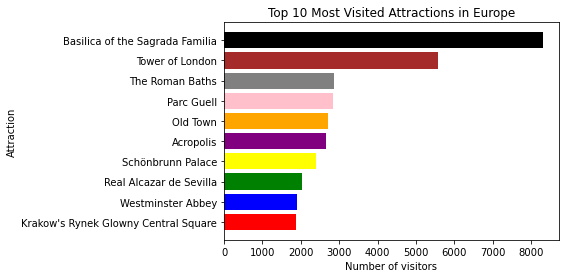

In [184]:
# Create a list of the names of the places
names_att = ['Basilica of the Sagrada Familia', 'Tower of London', 'The Roman Baths', 'Parc Guell', 'Old Town', 'Acropolis', 'Schönbrunn Palace', 'Real Alcazar de Sevilla', 'Westminster Abbey', "Krakow's Rynek Glowny Central Square"]

# Create a list of the number of visitors for each place
visitors_att = [8309, 5568, 2872, 2834, 2710, 2669, 2392, 2029, 1895, 1869]

# Zip the names and visitors together
data = list(zip(names_att, visitors_att))

# Sort the data by number of visitors in ascending order
sorted_data = sorted(data, key=lambda x: x[1])

# Unpack the sorted data
names_att, visitors_att = zip(*sorted_data)

# Create a bar graph with different colors for each bar
plt.barh(names_att, visitors_att, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'brown', 'black'])

# Add labels to the x and y axes
plt.ylabel('Attraction')
plt.xlabel('Number of visitors')
plt.title('Top 10 Most Visited Attractions in Europe')

# Show the graph
plt.show()


In [159]:
# Show top 20 most visited attractions
top_20_att = ds_com['Name'].value_counts().head(20)
print(top_20_att)

Basilica of the Sagrada Familia         8309
Tower of London                         5568
The Roman Baths                         2872
Parc Guell                              2834
Old Town                                2710
Acropolis                               2669
Schönbrunn Palace                       2392
Real Alcazar de Sevilla                 2029
Westminster Abbey                       1895
Krakow's Rynek Glowny Central Square    1869
Casa Batllo                             1789
The Alhambra                            1773
Royal Botanic Gardens, Kew              1647
Royal Albert Dock Liverpool             1637
Canal Grande                            1602
Stonehenge                              1402
Torre de Belém                          1397
Catedral de Sevilla                     1368
Pompeii Archaeological Park             1362
Palace of Versailles                    1344
Name: Name, dtype: int64


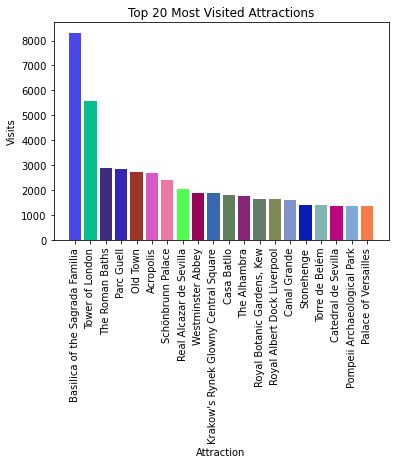

In [182]:
import random 
# Get the top 20 attractions
top_20_att = ds_com['Name'].value_counts().head(20)

# Get the names of the attractions
attractions_20 = top_20_att.index

# Get the number of visits for each attraction
visits_20 = top_20_att.values

# Create a list of 20 different colors
colors = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(20)]

# Create the bar chart
plt.bar(attractions_20, visits_20, color=colors)

# Add labels and title
plt.xlabel('Attraction')
plt.ylabel('Visits')
plt.title('Top 20 Most Visited Attractions')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the chart
plt.show()


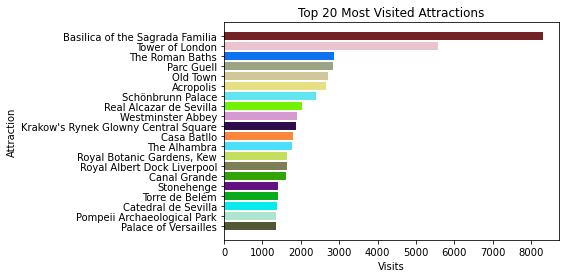

In [185]:
# Get the top 20 attractions
top_20_att = ds_com['Name'].value_counts().head(20)

# Get the names of the attractions
attractions_20 = top_20_att.index

# Get the number of visits for each attraction
visits_20 = top_20_att.values

# Zip the names and visits together
data = list(zip(attractions_20, visits_20))

# Sort the data by number of visits in ascending order
sorted_data = sorted(data, key=lambda x: x[1])

# Unpack the sorted data
attractions_20, visits_20 = zip(*sorted_data)

# Create a list of 20 different colors
colors = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(20)]

# Create the bar chart with the horizontal orientation
plt.barh(attractions_20, visits_20, color=colors)

# Add labels and title
plt.ylabel('Attraction')
plt.xlabel('Visits')
plt.title('Top 20 Most Visited Attractions')

# Show the chart
plt.show()

# Modeling pre-pandemic

In [80]:
# Create a pivot table
pt_table_pre = pd.pivot_table(ds_pre_pandemicPT[['userName','Name']],
                    index= 'userName',                                  # Each row will be a user
                    columns= 'Name',                       # Each product will be an attraction
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the product is present in the document, otherwise 0
pt_table_pre.head()
pt_table_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 007JNR@007JNR to 桂子 大@_T2961PL
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bom Jesus do Monte                3804 non-null   float64
 1   Cais da Ribeira                   3804 non-null   float64
 2   Mosteiro dos Jeronimos            3804 non-null   float64
 3   Park and National Palace of Pena  3804 non-null   float64
 4   Ponte de Dom Luís I               3804 non-null   float64
 5   Quinta da Regaleira               3804 non-null   float64
 6   Torre de Belém                    3804 non-null   float64
dtypes: float64(7)
memory usage: 237.8+ KB


In [81]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions
# More info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
frequent_itemsets = apriori(pt_table_pre, min_support=0.03, use_colnames=True)

/Users/katia/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [82]:
# Generate the association rules - by support
rulesSupport = association_rules(frequent_itemsets, metric="support", min_threshold=0.03)
rulesSupport.sort_values(by='support', ascending=False, inplace=True)
rulesSupport.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.280231,0.328339,0.103049,0.367730,1.119971,0.011039,1.062301
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.328339,0.280231,0.103049,0.313851,1.119971,0.011039,1.048998
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.145636,0.254995,0.063617,0.436823,1.713067,0.026481,1.322862
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.254995,0.145636,0.063617,0.249485,1.713067,0.026481,1.138369
2,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.280231,0.254995,0.044690,0.159475,0.625404,-0.026768,0.886357
3,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254995,0.280231,0.044690,0.175258,0.625404,-0.026768,0.872720
8,(Torre de Belém),(Park and National Palace of Pena),0.328339,0.254995,0.043901,0.133707,0.524352,-0.039823,0.859992
9,(Park and National Palace of Pena),(Torre de Belém),0.254995,0.328339,0.043901,0.172165,0.524352,-0.039823,0.811347
0,(Cais da Ribeira),(Ponte de Dom Luís I),0.077550,0.208728,0.040221,0.518644,2.484788,0.024034,1.643840
1,(Ponte de Dom Luís I),(Cais da Ribeira),0.208728,0.077550,0.040221,0.192695,2.484788,0.024034,1.142629


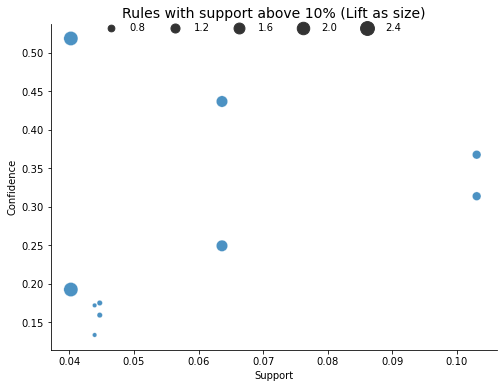

In [83]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=rulesSupport, x="support", y="confidence", size="lift", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Rules with support above 10% (Lift as size)", fontsize=plots_Title_fontSize)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

In [84]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.03)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cais da Ribeira),(Ponte de Dom Luís I),0.077550,0.208728,0.040221,0.518644,2.484788,0.024034,1.643840
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.145636,0.254995,0.063617,0.436823,1.713067,0.026481,1.322862
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.280231,0.328339,0.103049,0.367730,1.119971,0.011039,1.062301
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.328339,0.280231,0.103049,0.313851,1.119971,0.011039,1.048998
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.254995,0.145636,0.063617,0.249485,1.713067,0.026481,1.138369
1,(Ponte de Dom Luís I),(Cais da Ribeira),0.208728,0.077550,0.040221,0.192695,2.484788,0.024034,1.142629
3,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254995,0.280231,0.044690,0.175258,0.625404,-0.026768,0.872720
9,(Park and National Palace of Pena),(Torre de Belém),0.254995,0.328339,0.043901,0.172165,0.524352,-0.039823,0.811347
2,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.280231,0.254995,0.044690,0.159475,0.625404,-0.026768,0.886357
8,(Torre de Belém),(Park and National Palace of Pena),0.328339,0.254995,0.043901,0.133707,0.524352,-0.039823,0.859992


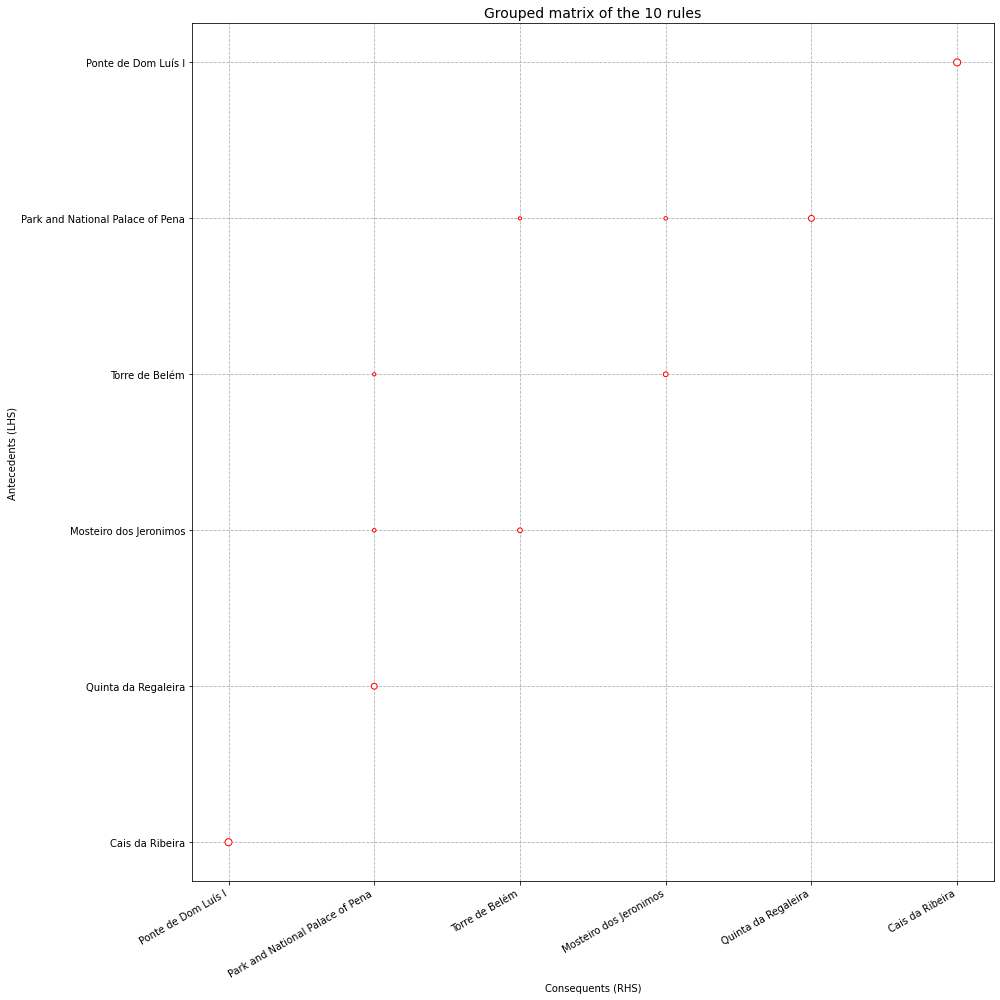

In [85]:
# Bubble plot of the rules

# Replace frozen sets with strings
rulesConfidence['antecedents_'] = rulesConfidence['antecedents'].apply(lambda a: ','.join(list(a)))
rulesConfidence['consequents_'] = rulesConfidence['consequents'].apply(lambda a: ','.join(list(a)))

# Draw
fig, ax = plt.subplots(figsize=(14,14))
ax= plt.scatter(data=rulesConfidence, x='consequents_', y='antecedents_', s = rulesConfidence['lift']*20, edgecolors = "red", c = "white", zorder = 2)

# Decoration
nRules=rulesConfidence.shape[0]
plt.title(f"Grouped matrix of the {nRules} rules", fontsize=plots_Title_fontSize)
plt.xlabel("Consequents (RHS)")
plt.ylabel("Antecedents (LHS)")
plt.grid(ls = "--", zorder = 1)
fig.autofmt_xdate()
plt.tight_layout()

In [86]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cais da Ribeira),(Ponte de Dom Luís I),0.077550,0.208728,0.040221,0.518644,2.484788,0.024034,1.643840
1,(Ponte de Dom Luís I),(Cais da Ribeira),0.208728,0.077550,0.040221,0.192695,2.484788,0.024034,1.142629
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.254995,0.145636,0.063617,0.249485,1.713067,0.026481,1.138369
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.145636,0.254995,0.063617,0.436823,1.713067,0.026481,1.322862
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.280231,0.328339,0.103049,0.367730,1.119971,0.011039,1.062301
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.328339,0.280231,0.103049,0.313851,1.119971,0.011039,1.048998
3,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254995,0.280231,0.044690,0.175258,0.625404,-0.026768,0.872720
2,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.280231,0.254995,0.044690,0.159475,0.625404,-0.026768,0.886357
8,(Torre de Belém),(Park and National Palace of Pena),0.328339,0.254995,0.043901,0.133707,0.524352,-0.039823,0.859992
9,(Park and National Palace of Pena),(Torre de Belém),0.254995,0.328339,0.043901,0.172165,0.524352,-0.039823,0.811347


### Explore frequent item sets

In [87]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [88]:
# Length=2 and Support>=0.1
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.03)]

,support,itemsets,length
7,0.040221,"(Cais da Ribeira, Ponte de Dom Luís I)",2
8,0.044690,"(Mosteiro dos Jeronimos, Park and National Pal...",2
9,0.103049,"(Mosteiro dos Jeronimos, Torre de Belém)",2
10,0.063617,"(Quinta da Regaleira, Park and National Palace...",2
11,0.043901,"(Torre de Belém, Park and National Palace of P...",2


In [89]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.3) & (rulesConfidence['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_,consequents_
0,(Cais da Ribeira),(Ponte de Dom Luís I),0.077550,0.208728,0.040221,0.518644,2.484788,0.024034,1.643840,Cais da Ribeira,Ponte de Dom Luís I
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.145636,0.254995,0.063617,0.436823,1.713067,0.026481,1.322862,Quinta da Regaleira,Park and National Palace of Pena
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.280231,0.328339,0.103049,0.367730,1.119971,0.011039,1.062301,Mosteiro dos Jeronimos,Torre de Belém
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.328339,0.280231,0.103049,0.313851,1.119971,0.011039,1.048998,Torre de Belém,Mosteiro dos Jeronimos


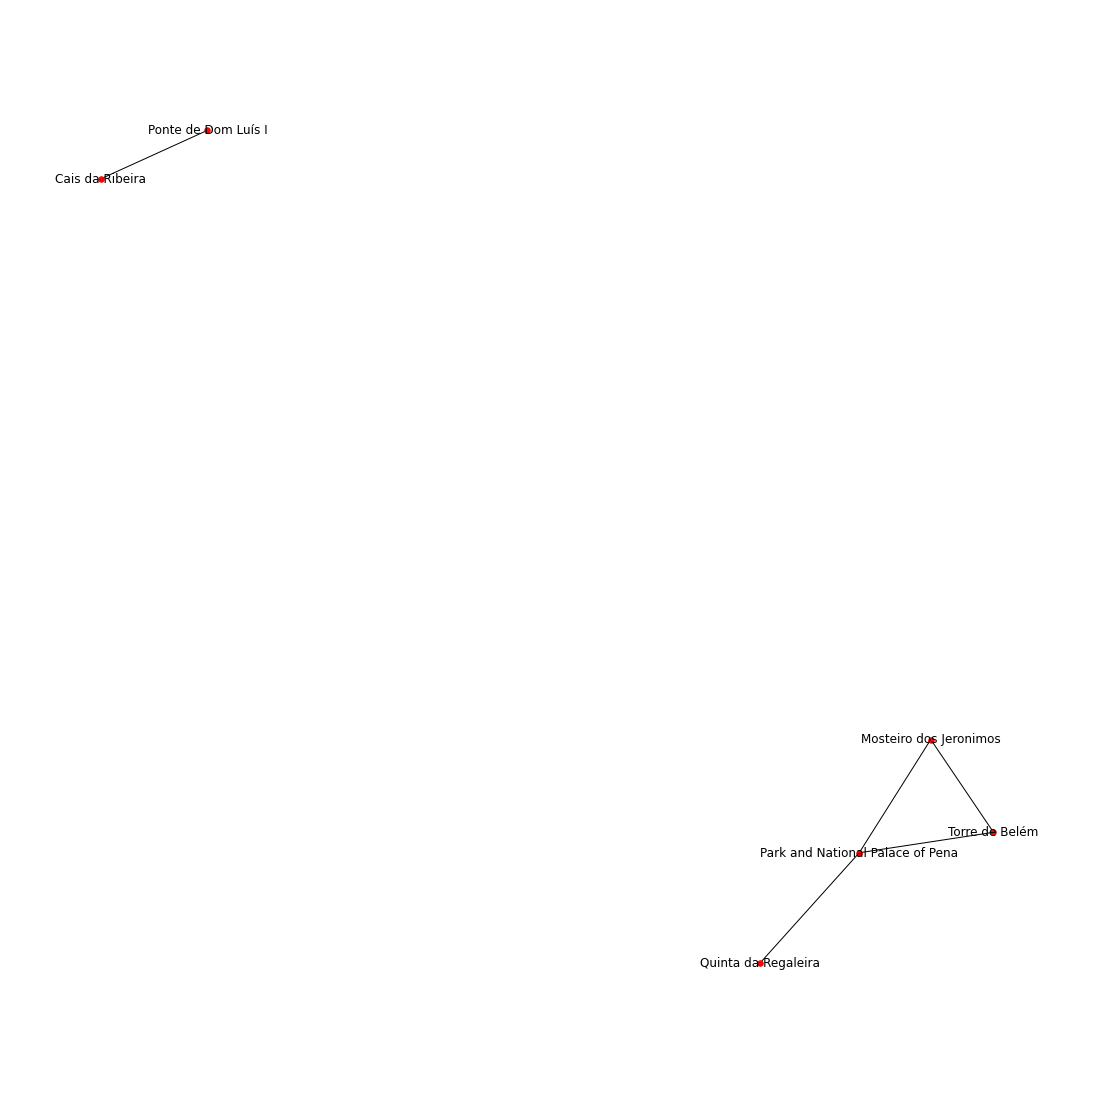

In [92]:
# Plot a basic network graph of the top 5 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot
rulesToPlot=rulesToPlot[:5]
fig = plt.figure(figsize=(15, 15)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
np.random.seed(1234)
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()